In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/complaints.csv')

<ipython-input-3-76158664d1fa>:1: DtypeWarning: Columns (9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/gdrive/MyDrive/complaints.csv')


In [ ]:
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2022-12-25,Credit card or prepaid card,Gift card,Unexpected or other fees,NaN,NaN,NaN,Incomm Holdings Inc.,NY,11576.0,NaN,NaN,Web,2022-12-25,Untimely response,No,NaN,6358716
1,2022-10-17,Credit card or prepaid card,Store credit card,Closing your account,Can't close your account,NaN,NaN,"Bread Financial Holdings, Inc.",PA,19610.0,NaN,NaN,Web,2023-01-03,Closed with explanation,Yes,NaN,6096325
2,2023-01-10,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",PA,19127.0,NaN,NaN,Web,2023-01-10,In progress,Yes,NaN,6413829
3,2022-12-31,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,MO,63033.0,NaN,Consent not provided,Web,2022-12-31,Closed with non-monetary relief,Yes,NaN,6382980
4,2022-12-29,Credit card or prepaid card,General-purpose prepaid card,Unexpected or other fees,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,CA,90746.0,NaN,NaN,Web,2022-12-29,Closed with explanation,Yes,NaN,6375967


In [ ]:
data.shape

(3220574, 18)

In [ ]:
#Checking data types throughout data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220574 entries, 0 to 3220573
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 442.

In [ ]:
data.isnull().sum()

Date received                         0
Product                               0
Sub-product                      235293
Issue                                 0
Sub-issue                        688827
Consumer complaint narrative    2057501
Company public response         1804867
Company                               0
State                             40348
ZIP code                          40818
Tags                            2859179
Consumer consent provided?       829231
Submitted via                         0
Date sent to company                  0
Company response to consumer          4
Timely response?                      0
Consumer disputed?              2452134
Complaint ID                          0
dtype: int64

In [ ]:
#Fixing null values
data = data.fillna('')
data.isnull().sum()

Date received                   0
Product                         0
Sub-product                     0
Issue                           0
Sub-issue                       0
Consumer complaint narrative    0
Company public response         0
Company                         0
State                           0
ZIP code                        0
Tags                            0
Consumer consent provided?      0
Submitted via                   0
Date sent to company            0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
Complaint ID                    0
dtype: int64

Step 1: Basic Analysis

---



---



In [ ]:
data['Company'].isna()

0          False
1          False
2          False
3          False
4          False
           ...  
3220569    False
3220570    False
3220571    False
3220572    False
3220573    False
Name: Company, Length: 3220574, dtype: bool

In [ ]:
###FOR RUNNING PURPOSES ONLY
data = data.sample(n=1000)

In [ ]:
complaints_by_bank = data['Complaint ID'].groupby(data['Company']).count().reset_index(name = 'complaint_count')
complaints_by_bank = complaints_by_bank.sort_values(by='complaint_count', ascending=False)
print(complaints_by_bank)

                                    Company  complaint_count
72                            EQUIFAX, INC.              190
77      Experian Information Solutions Inc.              140
183  TRANSUNION INTERMEDIATE HOLDINGS, INC.              133
22    BANK OF AMERICA, NATIONAL ASSOCIATION               40
199                   WELLS FARGO & COMPANY               30
..                                      ...              ...
87          FirstPoint Collection Resources                1
89                   GOLDMAN SACHS BANK USA                1
90                              GREAT LAKES                1
91                     GUARANTEED RATE INC.                1
204                    ZIONS BANCORPORATION                1

[205 rows x 2 columns]


In [ ]:
complaints_by_product = data['Complaint ID'].groupby(data['Product']).count().reset_index(name = 'complaint_count')
complaints_by_product = complaints_by_product.sort_values(by='complaint_count', ascending=False)
print(complaints_by_product)

                                              Product  complaint_count
6   Credit reporting, credit repair services, or o...              485
7                                     Debt collection              135
10                                           Mortgage              110
4                         Credit card or prepaid card               59
1                         Checking or savings account               48
5                                    Credit reporting               46
3                                         Credit card               30
0                             Bank account or service               19
14                                       Student loan               18
2                                       Consumer Loan               14
8   Money transfer, virtual currency, or money ser...               13
15                              Vehicle loan or lease               13
12          Payday loan, title loan, or personal loan                5
11    

In [ ]:
df = pd.DataFrame(data)

<Axes: xlabel='Company'>

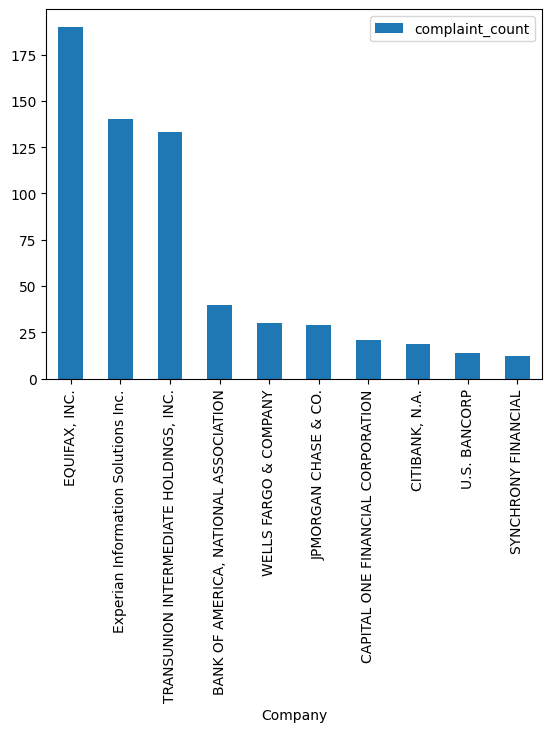

In [ ]:
dfcb = pd.DataFrame(complaints_by_bank)
dfcb[:10].plot.bar(x='Company', y = 'complaint_count')

<Axes: xlabel='Product'>

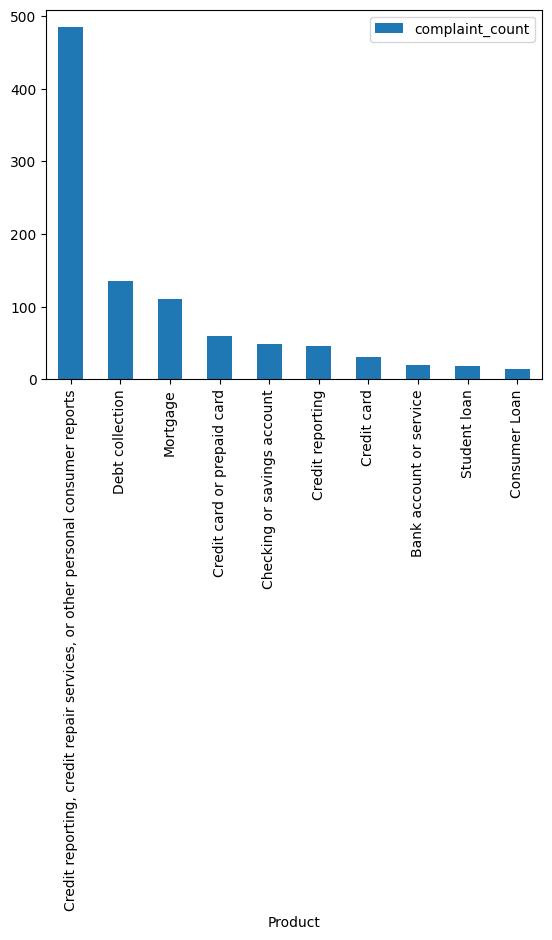

In [ ]:
dfcp = pd.DataFrame(complaints_by_product)
dfcp[:10].plot.bar(x = 'Product', y = 'complaint_count')

In [ ]:
#TOP PRODUCT COMPLAINTS PER COMPANY
for comp in complaints_by_bank['Company'][:10]:
    dfcopy = df.query('Company == @comp')
    complaints_by_product_per_comp = dfcopy['Complaint ID'].groupby(dfcopy['Product']).count().reset_index(name = 'complaint_count')
    complaints_by_product_per_comp = complaints_by_product_per_comp.sort_values(by='complaint_count', ascending=False)
    print(comp +":\n")
    print(complaints_by_product_per_comp[:5])
    print("\n")

EQUIFAX, INC.:

                                             Product  complaint_count
1  Credit reporting, credit repair services, or o...              171
0                                   Credit reporting               15
2                                    Debt collection                3
3                              Vehicle loan or lease                1


Experian Information Solutions Inc.:

                                             Product  complaint_count
1  Credit reporting, credit repair services, or o...              119
0                                   Credit reporting               18
2                                    Debt collection                3


TRANSUNION INTERMEDIATE HOLDINGS, INC.:

                                             Product  complaint_count
1  Credit reporting, credit repair services, or o...              122
0                                   Credit reporting               11


BANK OF AMERICA, NATIONAL ASSOCIATION:

                   

CITIBANK, N.A.:

                                             Product  complaint_count
2                        Credit card or prepaid card                6
1                                        Credit card                4
3  Credit reporting, credit repair services, or o...                3
5                                           Mortgage                3
0                        Checking or savings account                2
4                                    Debt collection                1


<Axes: xlabel='Product'>

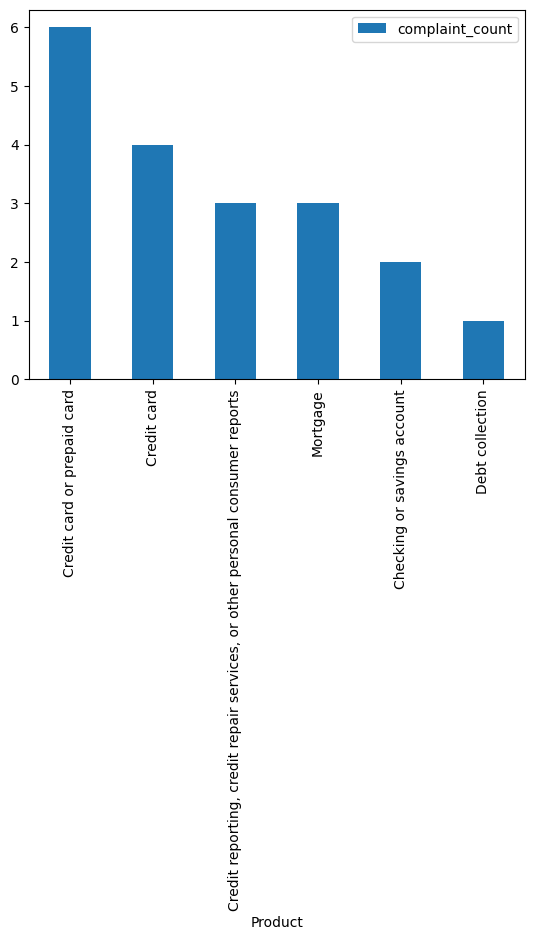

In [ ]:
#Top Product Complaints for Citi
dfcopy = df.query('Company == "CITIBANK, N.A."')
citi_complaints_by_product = dfcopy['Complaint ID'].groupby(dfcopy['Product']).count().reset_index(name = 'complaint_count')
citi_complaints_by_product = citi_complaints_by_product.sort_values(by='complaint_count', ascending=False)
print("CITIBANK, N.A." +":\n")
print(citi_complaints_by_product[:10])
dfciti = pd.DataFrame(citi_complaints_by_product)
dfciti[:10].plot.bar(x='Product', y = 'complaint_count')

EQUIFAX, INC. Timely Responses:
3420
EQUIFAX, INC. Untimely Responses:
0
EQUIFAX, INC.
Experian Information Solutions Inc. Timely Responses:
2520
Experian Information Solutions Inc. Untimely Responses:
0
Experian Information Solutions Inc.
TRANSUNION INTERMEDIATE HOLDINGS, INC. Timely Responses:
2394
TRANSUNION INTERMEDIATE HOLDINGS, INC. Untimely Responses:
0
TRANSUNION INTERMEDIATE HOLDINGS, INC.
BANK OF AMERICA, NATIONAL ASSOCIATION Timely Responses:
720
BANK OF AMERICA, NATIONAL ASSOCIATION Untimely Responses:
0
BANK OF AMERICA, NATIONAL ASSOCIATION
WELLS FARGO & COMPANY Timely Responses:
522
WELLS FARGO & COMPANY Untimely Responses:
18
WELLS FARGO & COMPANY
JPMORGAN CHASE & CO. Timely Responses:
522
JPMORGAN CHASE & CO. Untimely Responses:
0
JPMORGAN CHASE & CO.
CAPITAL ONE FINANCIAL CORPORATION Timely Responses:
378
CAPITAL ONE FINANCIAL CORPORATION Untimely Responses:
0
CAPITAL ONE FINANCIAL CORPORATION
CITIBANK, N.A. Timely Responses:
342
CITIBANK, N.A. Untimely Responses:
0
CI

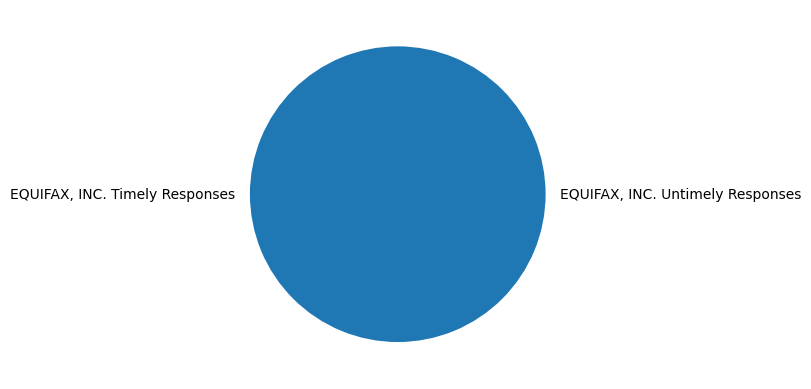

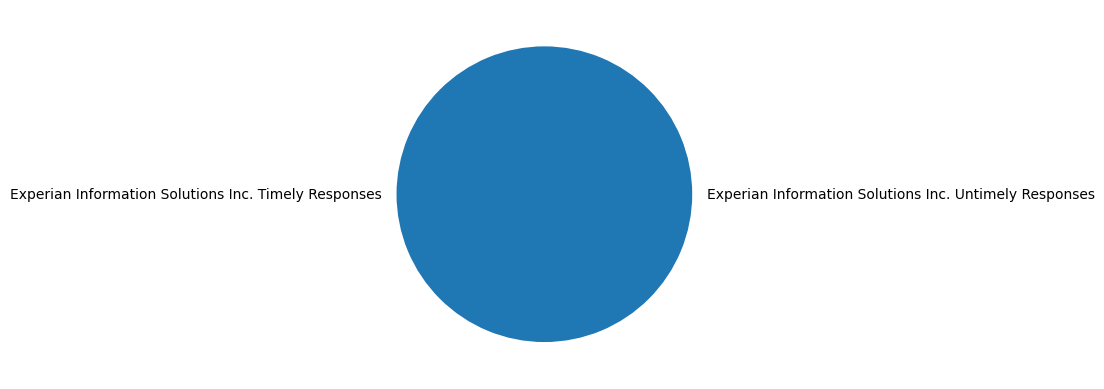

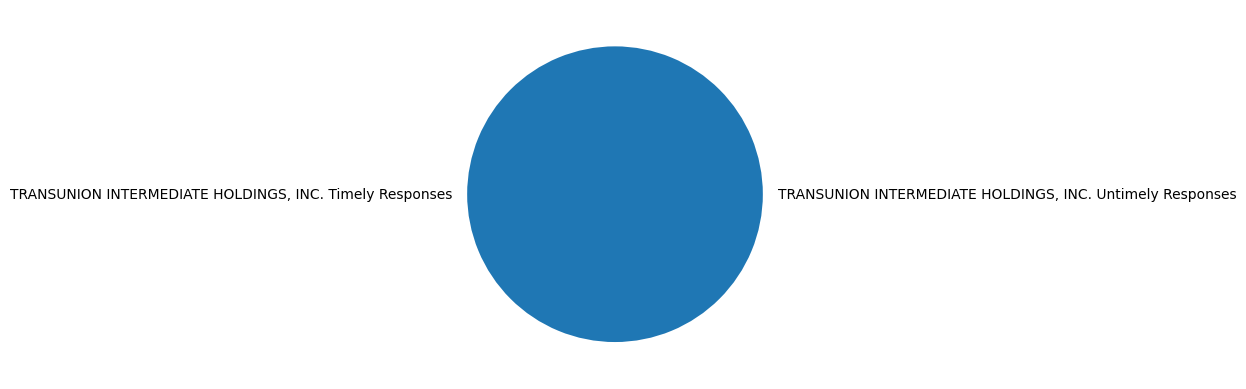

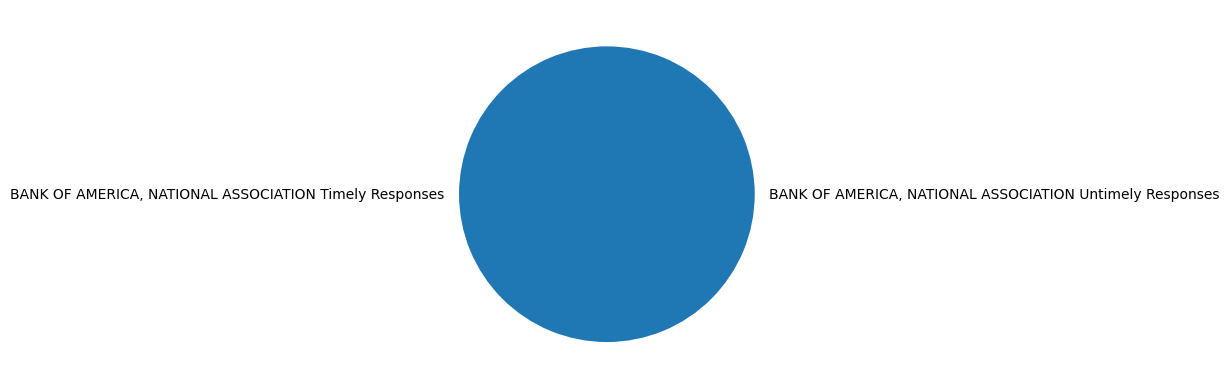

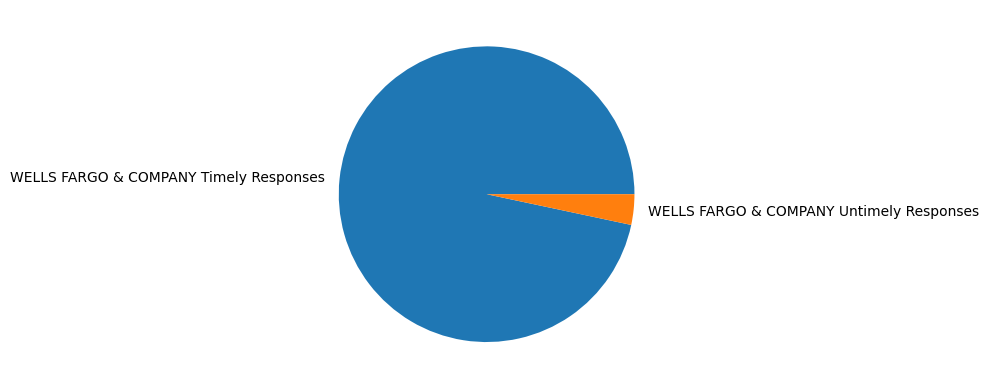

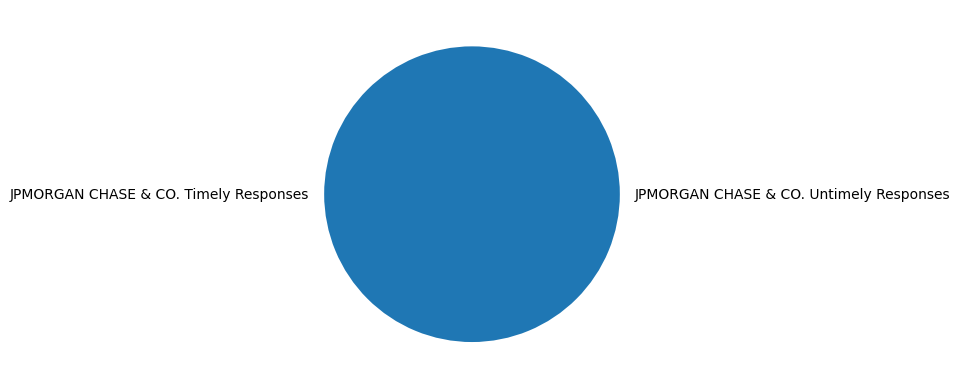

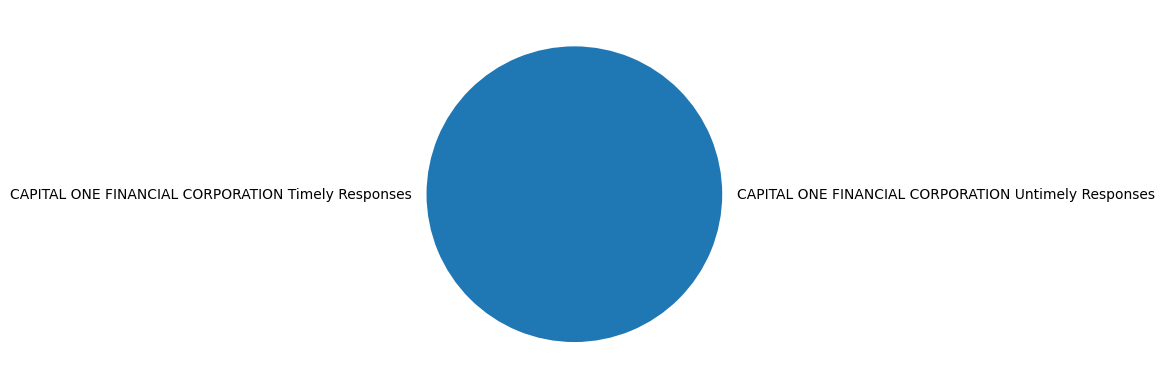

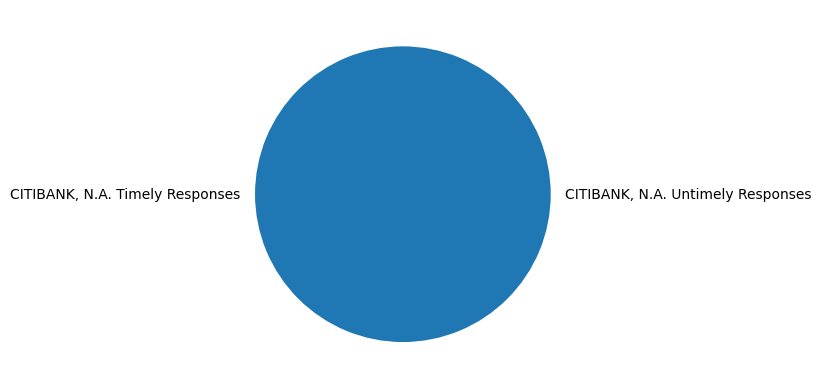

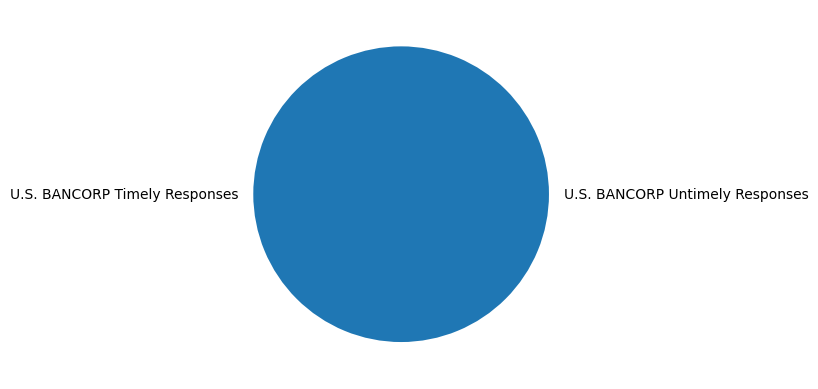

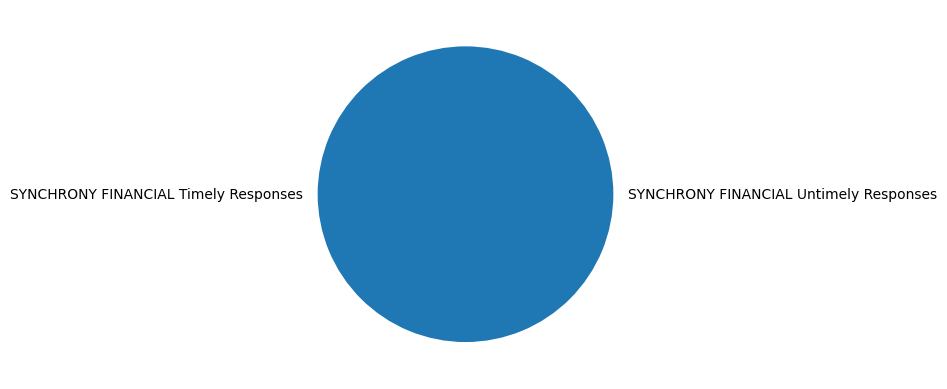

In [ ]:
#Checking timeliness of responses for the top 10 banks
for comp in complaints_by_bank['Company'][:10]:
  dfcopy = df.query('Company == @comp')
  dfcopy1 = dfcopy.query('`Timely response?` == "Yes"')
  size1 = dfcopy1.size
  print(comp + " Timely Responses:")
  print(size1)
  dfcopy2 = dfcopy.query('`Timely response?` != "Yes"')
  size2 = dfcopy2.size
  print(comp + " Untimely Responses:")
  print(size2)
  labels = comp + ' Timely Responses', comp + ' Untimely Responses'
  sizes = [size1, size2]
  fig, ax = plt.subplots()
  print(comp)
  ax.pie(sizes, labels=labels)

([<matplotlib.patches.Wedge at 0x7f7db1749900>,
 [Text(0.6394201484370705, 0.895065290228995, 'EQUIFAX, INC.'),
  Text(-0.943324660851939, 0.5658079039997359, 'Experian Information Solutions Inc.'),
  Text(-0.7460744104151309, -0.808314897873171, 'TRANSUNION INTERMEDIATE HOLDINGS, INC.'),
  Text(0.1317500028137071, -1.092081469835739, 'BANK OF AMERICA, NATIONAL ASSOCIATION'),
  Text(0.49840879430998086, -0.9806062786635987, 'WELLS FARGO & COMPANY'),
  Text(0.7620986255308045, -0.7932248640606638, 'JPMORGAN CHASE & CO.'),
  Text(0.9347273399808578, -0.5799006810586707, 'CAPITAL ONE FINANCIAL CORPORATION'),
  Text(1.0313423174516216, -0.3825349973969948, 'CITIBANK, N.A.'),
  Text(1.0801846568269444, -0.20784876029376914, 'U.S. BANCORP'),
  Text(1.0980185937201272, -0.06599369549338947, 'SYNCHRONY FINANCIAL')],
 [Text(0.3487746264202203, 0.4882174310339972, '30.3%'),
  Text(-0.5145407241010576, 0.308622493090765, '22.3%'),
  Text(-0.4069496784082532, -0.4408990352035478, '21.2%'),
  Text(

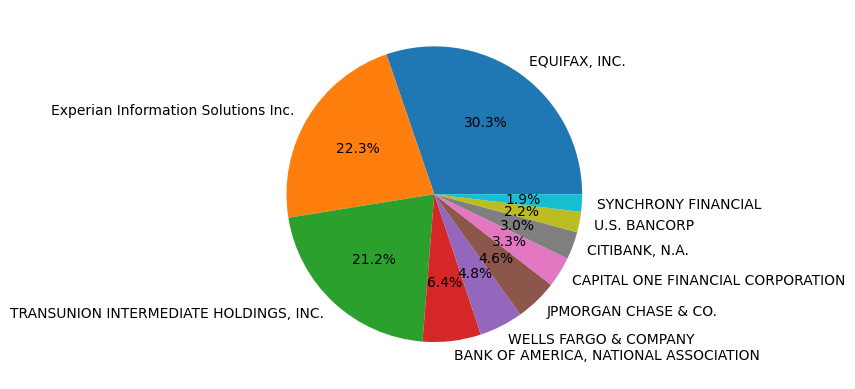

In [ ]:
#Distribution of complaints per bank
top20 = complaints_by_bank['Company'][:20]
complaints_by_bank.loc[~complaints_by_bank['Company'].isin(top20), 'Company'] = 'Other'
complaints_by_bank.groupby(complaints_by_bank['Company'])
labels = complaints_by_bank["Company"][:10]
values = complaints_by_bank["complaint_count"][:10]
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7f7db17e13c0>,
 [Text(-0.010754191226932636, 1.0999474293669924, 'Credit reporting, credit repair services, or other personal consumer reports'),
  Text(-0.9858985097840445, -0.48785666789088844, 'Debt collection'),
  Text(-0.338554718543553, -1.0466043677301828, 'Mortgage'),
  Text(0.2592292067747064, -1.0690183433201494, 'Credit card or prepaid card'),
  Text(0.6088898980937196, -0.9161075766521201, 'Checking or savings account'),
  Text(0.8568123087140674, -0.6898352467336456, 'Credit reporting'),
  Text(0.9997813157336883, -0.45873447735025874, 'Credit card'),
  Text(1.0600041315098088, -0.2939238697046166, 'Bank account or service'),
  Text(1.0876629666780215, -0.16428411644819835, 'Student loan'),
  Text(1.0988553053275152, -0.050169890906533995, 'Consumer Loan')],
 [Text(-0.0058659224874178005, 0.5999713251092685, '50.3%'),
  Text(-0.5377628235185696, -0.26610363703139367, '14.0%'),
  Text(-0.18466621011466525, -0.5708751096710087, '11.4%'),
  Te

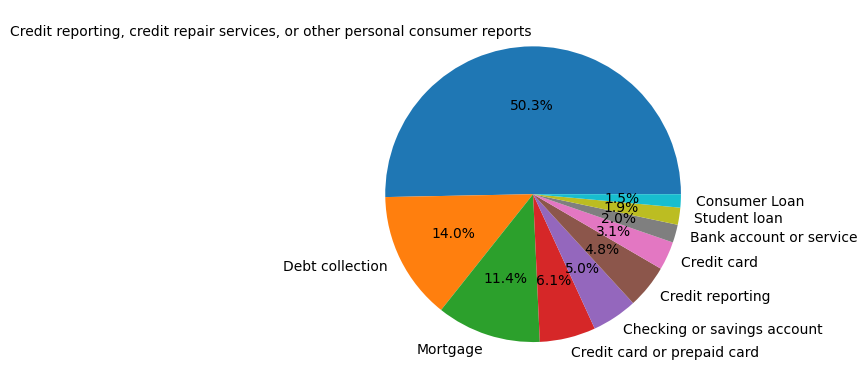

In [ ]:
#Distribution of complaints per product
top10 = complaints_by_product['Product'][:10]
complaints_by_product.groupby(complaints_by_product['Product'])
labels = top10
prod_values = complaints_by_product["complaint_count"][:10]
fig, ax = plt.subplots()
ax.pie(prod_values, labels=labels, autopct='%1.1f%%')

Step 2: Text Preparation and Pre-Processing

---



---




In [ ]:
#making everything lowercase
df['issue'] = df['Issue'].str.lower()
df[['issue']].head()

,issue
256089,improper use of your report
2826279,incorrect information on your report
536911,incorrect information on your report
2415264,incorrect information on your report
2258558,attempts to collect debt not owed


In [ ]:
#remove funky characters
df['issue_punc'] = df['issue'].str.replace('[^A-z ]','',regex=True).str.replace(' +',' ',regex=True).str.strip()
df[['issue', 'issue_punc']].head()

,issue,issue_punc
256089,improper use of your report,improper use of your report
2826279,incorrect information on your report,incorrect information on your report
536911,incorrect information on your report,incorrect information on your report
2415264,incorrect information on your report,incorrect information on your report
2258558,attempts to collect debt not owed,attempts to collect debt not owed


In [ ]:
#tokenization
from nltk.tokenize import sent_tokenize, word_tokenize
df['issue_punc_tok'] = df['issue_punc'].apply(lambda x: word_tokenize(x))
df[['issue_punc', 'issue_punc_tok']].head()

,issue_punc,issue_punc_tok
256089,improper use of your report,"[improper, use, of, your, report]"
2826279,incorrect information on your report,"[incorrect, information, on, your, report]"
536911,incorrect information on your report,"[incorrect, information, on, your, report]"
2415264,incorrect information on your report,"[incorrect, information, on, your, report]"
2258558,attempts to collect debt not owed,"[attempts, to, collect, debt, not, owed]"


In [ ]:
#Stopword removal
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords.insert(0, "xxxx")
stopwords.insert(0, "xxxxxxxx")
df['issue_punc_tok_sw'] = df['issue_punc_tok'].apply(lambda tokens: [word for word in tokens if word not in stopwords])
df[['issue_punc_tok', 'issue_punc_tok_sw']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,issue_punc_tok,issue_punc_tok_sw
256089,"[improper, use, of, your, report]","[improper, use, report]"
2826279,"[incorrect, information, on, your, report]","[incorrect, information, report]"
536911,"[incorrect, information, on, your, report]","[incorrect, information, report]"
2415264,"[incorrect, information, on, your, report]","[incorrect, information, report]"
2258558,"[attempts, to, collect, debt, not, owed]","[attempts, collect, debt, owed]"


In [ ]:
#Lemmatization
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['issue_punc_tok_sw_lemma'] = df['issue_punc_tok_sw'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

# Print the dataframe with lemmatized tokens
df[['issue_punc_tok_sw', 'issue_punc_tok_sw_lemma']].head()

,issue_punc_tok_sw,issue_punc_tok_sw_lemma
256089,"[improper, use, report]","[improper, use, report]"
2826279,"[incorrect, information, report]","[incorrect, information, report]"
536911,"[incorrect, information, report]","[incorrect, information, report]"
2415264,"[incorrect, information, report]","[incorrect, information, report]"
2258558,"[attempts, collect, debt, owed]","[attempt, collect, debt, owed]"


In [ ]:
#Repeating the text preparation process for 'Consumer complaint narrative'

#Making everything lowercase
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].str.lower()

#Removing funky characters
df['Complaint_nopunct'] = df['Consumer complaint narrative'].str.replace('[^A-z ]','',regex=True).str.replace(' +',' ',regex=True).str.strip()

In [ ]:
#Tokenization
from nltk.tokenize import sent_tokenize, word_tokenize
df['Complaint_nopunct_token'] = df['Complaint_nopunct'].apply(lambda x: word_tokenize(x))

In [ ]:
#Stopword removal
df['Complaint_nopunct_token_stop'] = df['Complaint_nopunct_token'].apply(lambda tokens: [word for word in tokens if word not in stopwords])

In [ ]:
#Lemmatization
df['Complaint_nopunct_token_stop_lem'] = df['Complaint_nopunct_token_stop'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
df['Complaint_nopunct_token_stop_lem'].head()

256089     [ex-wife, using, social, security, number, wit...
2826279    [xx/xx/2021, u, washington, amount, {, $, 140....
536911                                                    []
2415264    [account, appearing, credit, report, ., result...
2258558                                                   []
Name: Complaint_nopunct_token_stop_lem, dtype: object

In [ ]:
#Repeating the text preparation process for 'Company public response'

#Making everything lowercase
df['Company public response'] = df['Company public response'].str.lower()

#Removing funky characters
df['Response_nopunct'] = df['Company public response'].str.replace('[^A-z ]','',regex=True).str.replace(' +',' ',regex=True).str.strip()

In [ ]:
#Tokenization
from nltk.tokenize import sent_tokenize, word_tokenize
df['Response_nopunct_token'] = df['Response_nopunct'].apply(lambda x: word_tokenize(x))

In [ ]:
#Stopword removal
df['Response_nopunct_token_stop'] = df['Response_nopunct_token'].apply(lambda tokens: [word for word in tokens if word not in stopwords])

In [ ]:
#Lemmatization
df['Response_nopunct_token_stop_lem'] = df['Response_nopunct_token_stop'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
df['Response_nopunct_token_stop_lem'].head()

256089     [company, responded, consumer, cfpb, chooses, ...
2826279    [company, responded, consumer, cfpb, chooses, ...
536911     [company, responded, consumer, cfpb, chooses, ...
2415264                                                   []
2258558    [company, responded, consumer, cfpb, chooses, ...
Name: Response_nopunct_token_stop_lem, dtype: object

Word Embeddings (optional)



---



---



In [ ]:
#importing packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import sklearn
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# using GloVe (Global Vectors) word embeddings by Stanford, obtain the word embedding
!wget --no-check-certificate \
     http://nlp.stanford.edu/data/glove.6B.zip \
     -O /tmp/glove.6B.zip

# extract them into a temporary folder.
import os
import zipfile
with zipfile.ZipFile('/tmp/glove.6B.zip', 'r') as zip_ref:
    zip_ref.extractall('/tmp/glove')


--2023-08-11 01:57:43--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-08-11 01:57:43--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-08-11 01:57:43--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘/tmp/glove.6B.zip’


In [ ]:
#create dictionary called embeddings_index and append pretrained glove embeddings
import numpy as np
embeddings_index = {}
f = open('/tmp/glove/glove.6B.100d.txt')

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))
def find_closest_embeddings(embedding):
    return sorted(embeddings_index.keys(), key=lambda word: spatial.distance.euclidean(embeddings_index[word], embedding))

Found 400000 word vectors.


In [ ]:
#Using GloVe embeddings to encode data
X = df['Complaint_nopunct_token_stop_lem']
y = df['Response_nopunct_token_stop_lem']
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y , test_size = 0.20)

In [ ]:
#Finding the number of products
n = len(pd.unique(df['Product']))

print("No.of.unique values :",
      n)



No.of.unique values : 16


Step 3: Topic Modeling/Clustering


---



---



In [ ]:
#LDA Topic Modeling
import pprint
from gensim import corpora
from gensim import models
processed_corpus = df['Complaint_nopunct_token_stop_lem']

#define dictionary
dictionary = corpora.Dictionary(processed_corpus)

#Convert corpus to vectors
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]

#Model
##Number of clusters = number of distinct products
lda_model = models.LdaMulticore(corpus=bow_corpus, id2word=dictionary, num_topics=16)
doc_lda = lda_model[bow_corpus]

In [ ]:
#Getting clusters (print top 5-10 keywords for each cluster)
pprint.pprint(lda_model.print_topics(num_words=5))
print(dictionary)

[(0,
  '0.037*"," + 0.034*"." + 0.026*"xx/xx/xxxx" + 0.014*"credit" + '
  '0.012*"account"'),
 (1, '0.048*"." + 0.045*"," + 0.022*"credit" + 0.011*"account" + 0.011*":"'),
 (2, '0.050*"." + 0.040*"," + 0.023*")" + 0.023*"credit" + 0.022*"account"'),
 (3,
  '0.074*"." + 0.055*"," + 0.020*"credit" + 0.017*"account" + 0.012*"report"'),
 (4, '0.053*"." + 0.030*"," + 0.012*"credit" + 0.012*"``" + 0.012*"payment"'),
 (5, '0.053*"." + 0.029*"," + 0.022*"}" + 0.020*"$" + 0.020*"{"'),
 (6, '0.079*"." + 0.037*"," + 0.035*"account" + 0.019*":" + 0.014*"credit"'),
 (7, '0.084*"," + 0.049*"." + 0.013*"credit" + 0.013*"consumer" + 0.012*"("'),
 (8, '0.054*"," + 0.036*"$" + 0.033*"}" + 0.032*"." + 0.030*"{"'),
 (9, '0.047*"," + 0.045*"." + 0.023*"account" + 0.020*"{" + 0.019*"$"'),
 (10, '0.081*"." + 0.030*"," + 0.019*"(" + 0.016*")" + 0.015*"report"'),
 (11, '0.081*"." + 0.047*"," + 0.019*"account" + 0.015*"{" + 0.014*"}"'),
 (12, '0.083*"." + 0.036*"," + 0.018*")" + 0.015*"account" + 0.013*"("'),
 

In [ ]:
#Testing the clustering
doc_lda = lda_model[bow_corpus]
for t, doc in zip(X[:3], doc_lda[:3]):
    pprint.pprint((t, doc))

(['ex-wife',
  'using',
  'social',
  'security',
  'number',
  'without',
  'consent',
  'knowledge',
  '.',
  'upon',
  'completing',
  'in-depth',
  'research',
  ',',
  'social',
  'security',
  'number',
  'utilized',
  'check',
  '(',
  'least',
  ')',
  'credit',
  'score',
  'xx/xx/2022',
  'xx/xx/2022',
  '.',
  'documentation',
  'two',
  'date',
  ',',
  'ssn',
  'may',
  'used',
  ',',
  'credit',
  'score',
  'dropped',
  'significantly',
  'one',
  'lender',
  '.',
  'know',
  'illegal',
  'want',
  'follow',
  'correct',
  'step',
  'remedy',
  'situation',
  '(',
  'fine',
  ',',
  'cybercrime',
  ',',
  'etc',
  '.',
  ')',
  '.',
  'action',
  'detrimentally',
  'impacted',
  'credit',
  'score',
  ',',
  'financial',
  'reputation',
  ',',
  'left',
  'feeling',
  'vulnerable',
  ',',
  'exposed',
  ',',
  'worried',
  'use',
  'social',
  'security',
  'number',
  '.'],
 [(0, 0.98842394)])
(['xx/xx/2021',
  'u',
  'washington',
  'amount',
  '{',
  '$',
  '140.00',


In [ ]:
processed_corpus2 = df['Response_nopunct_token_stop_lem']

#define dictionary
dictionary2 = corpora.Dictionary(processed_corpus)

#Convert corpus to vectors
bow_corpus2 = [dictionary2.doc2bow(text) for text in processed_corpus2]

#Model
lda_model2 = models.LdaMulticore(corpus=bow_corpus2, id2word=dictionary2, num_topics=16)
doc_lda2 = lda_model[bow_corpus2]

In [ ]:
#Getting clusters (print top 5-10 keywords for each cluster)
pprint.pprint(lda_model2.print_topics(num_words=5))
print(dictionary2)

[(0,
  '0.076*"company" + 0.052*"response" + 0.052*"cfpb" + 0.052*"public" + '
  '0.052*"consumer"'),
 (1,
  '0.008*"provide" + 0.008*"cfpb" + 0.008*"consumer" + 0.008*"chooses" + '
  '0.008*"company"'),
 (2,
  '0.045*"company" + 0.043*"chooses" + 0.043*"cfpb" + 0.043*"provide" + '
  '0.043*"responded"'),
 (3,
  '0.084*"company" + 0.083*"response" + 0.082*"public" + 0.082*"provide" + '
  '0.082*"chooses"'),
 (4,
  '0.051*"company" + 0.030*"provide" + 0.030*"chooses" + 0.030*"public" + '
  '0.030*"response"'),
 (5,
  '0.014*"company" + 0.014*"consumer" + 0.011*"public" + 0.011*"responded" + '
  '0.011*"cfpb"'),
 (6,
  '0.033*"company" + 0.017*"consumer" + 0.017*"authorized" + 0.017*"response" '
  '+ 0.017*"law"'),
 (7,
  '0.072*"company" + 0.070*"response" + 0.070*"chooses" + 0.070*"provide" + '
  '0.070*"public"'),
 (8,
  '0.012*"company" + 0.008*"cfpb" + 0.008*"chooses" + 0.008*"public" + '
  '0.008*"response"'),
 (9,
  '0.071*"public" + 0.071*"company" + 0.071*"chooses" + 0.071*"prov

In [ ]:
#Testing the clustering
doc_lda = lda_model[bow_corpus]
for t, doc in zip(y[:3], doc_lda[:3]):
    pprint.pprint((t, doc))

(['company',
  'responded',
  'consumer',
  'cfpb',
  'chooses',
  'provide',
  'public',
  'response'],
 [(0, 0.98842394)])
(['company',
  'responded',
  'consumer',
  'cfpb',
  'chooses',
  'provide',
  'public',
  'response'],
 [(14, 0.97158766)])
(['company',
  'responded',
  'consumer',
  'cfpb',
  'chooses',
  'provide',
  'public',
  'response'],
 [(0, 0.0625),
  (1, 0.0625),
  (2, 0.0625),
  (3, 0.0625),
  (4, 0.0625),
  (5, 0.0625),
  (6, 0.0625),
  (7, 0.0625),
  (8, 0.0625),
  (9, 0.0625),
  (10, 0.0625),
  (11, 0.0625),
  (12, 0.0625),
  (13, 0.0625),
  (14, 0.0625),
  (15, 0.0625)])


In [ ]:
#Complaint LDA Topic Visualization
#%pip install gensim
from gensim import corpora, models
%pip install pyLDAvis
import pyLDAvis.gensim_models
dictionary = corpora.Dictionary(df['Complaint_nopunct_token_stop_lem'])
corpus = [dictionary.doc2bow(tokens) for tokens in df['Complaint_nopunct_token_stop_lem']]
num_topics = 5
lda_model = models.LdaModel(corpus = corpus, id2word=dictionary, num_topics=num_topics)

In [ ]:
#Complaint LDA Topic Visualization
from pyLDAvis import gensim
!pip install pandas
!pip install --upgrade pandas
vis_data = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Response LDA Topic Visualization
dictionary2 = corpora.Dictionary(df['Response_nopunct_token_stop_lem'])
corpus2 = [dictionary2.doc2bow(tokens) for tokens in df['Response_nopunct_token_stop_lem']]
lda_model2 = models.LdaModel(corpus2, id2word=dictionary2, num_topics=num_topics)
vis_data2 = pyLDAvis.gensim_models.prepare(lda_model2, corpus2, dictionary2, n_jobs=1)
pyLDAvis.display(vis_data2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Add code that removes rows in df that don't have a customer complaint narrative, check with df.shape before and after
print(df.shape)
df = df.loc[data['Consumer complaint narrative'] != ""]
print(df.shape)

(1000, 31)
(351, 31)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Print the distinct products
n = len(pd.unique(df['Product']))

print("No.of.unique values :",
      n)

print(df['Product'].unique())

#Regrouping redundant products
df['Product_reg'] = df['Product']

df['Product_reg'] = df['Product_reg'].replace(['Credit reporting, credit repair services, or other personal consumer reports'], 'Credit reporting')
df['Product_reg'] = df['Product_reg'].replace(['Credit card or prepaid card'], 'Credit card')
df['Product_reg'] = df['Product_reg'].replace(['Checking or savings account'], 'Bank account or service')
df['Product_reg'] = df['Product_reg'].replace(['Money transfers'], 'Money transfer, virtual currency, or money service')


No.of.unique values : 15
['Credit reporting, credit repair services, or other personal consumer reports'
 'Debt collection' 'Mortgage' 'Payday loan, title loan, or personal loan'
 'Payday loan' 'Checking or savings account' 'Credit card or prepaid card'
 'Vehicle loan or lease'
 'Money transfer, virtual currency, or money service' 'Credit card'
 'Consumer Loan' 'Student loan' 'Bank account or service'
 'Credit reporting' 'Prepaid card']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
n = len(pd.unique(df['Product_reg']))

print("No.of.unique values :",
      n)

print(df['Product_reg'].unique())

No.of.unique values : 12
['Credit reporting' 'Debt collection' 'Mortgage'
 'Payday loan, title loan, or personal loan' 'Payday loan'
 'Bank account or service' 'Credit card' 'Vehicle loan or lease'
 'Money transfer, virtual currency, or money service' 'Consumer Loan'
 'Student loan' 'Prepaid card']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Classification by issue
!pip uninstall dask
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgbm
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error, explained_variance_score
from sklearn.model_selection import GridSearchCV

!pip install lightgbm==3.2.1
!pip install --upgrade pandas

df['Complaint_joined'] = df['Complaint_nopunct_token_stop_lem'].apply(' '.join)
df['Issue_joined'] = df['issue_punc_tok_sw_lemma'].apply(' '.join)

X = df['Complaint_joined']
Y = df['Issue_joined']

df['Complaint_Missing'] = df['Complaint_joined'].apply(lambda x: int(x.strip() == ''))
df.drop(columns=['Complaint_joined'], inplace=True)

label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

tfidf_vec = TfidfVectorizer(dtype=np.float32, sublinear_tf=True, use_idf=True, smooth_idf=True)
X_train_tfidf = tfidf_vec.fit_transform(X_train)
X_test_tfidf = tfidf_vec.transform(X_test)

#param_grid = {
#    'learning_rate': [0.1, 0.01],
#    'n_estimators': [50, 100, 150],
#    'max_depth': [4, 6],
#    'num_leaves': [30, 70],
#    'max_bin': [100, 300],
#}

estimator = lgbm.LGBMClassifier(objective='multiclass', num_class=len(np.unique(Y_encoded)), verbose=-1)

#model = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')
#model.fit(X_train_tfidf, Y_train)

#best_params = model.best_params_
#print("Best Parameters:", best_params)

num_classes = len(np.unique(Y_encoded))

reg_alpha_value = 0.01
reg_lambda_value = 0.01

clf_LGBM = lgbm.LGBMClassifier(objective='multiclass', num_class=num_classes, verbose=-1, learning_rate=0.1, max_depth=4, num_leaves=30, n_estimators=150, max_bin=100, reg_alpha=reg_alpha_value, reg_lambda=reg_lambda_value)
clf_LGBM.fit(X_train_tfidf, Y_train, verbose=-1)

predicted_labels = clf_LGBM.predict(X_test_tfidf)

accuracy = (predicted_labels == Y_test).mean()
print(Y_test[0])
print(f"Accuracy: {accuracy}")

recall = recall_score(Y_test, predicted_labels, average='weighted')
print(f"Recall: {recall}")

#print classification for a specific row in data, check that classifications make sense, print list of groups to know which group is which



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Found existing installation: dask 2022.12.1
Uninstalling dask-2022.12.1:
  Would remove:
    /usr/local/bin/dask
    /usr/local/lib/python3.10/dist-packages/dask-2022.12.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/dask/*
Proceed (Y/n)? 
  Successfully uninstalled dask-2022.12.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.2 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 3.3.5
    Uninstalling lightgbm-3.3.5:
      Successfully uninstalled lightgbm-3.3.5


/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  )


37
Accuracy: 0.323943661971831
Recall: 0.323943661971831


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Product column text proccessing

#making everything lowercase
df['product'] = df['Product_reg'].str.lower()
#remove funky characters
df['product_punc'] = df['product'].str.replace('[^A-z ]','',regex=True).str.replace(' +',' ',regex=True).str.strip()
#tokenization
from nltk.tokenize import sent_tokenize, word_tokenize
df['product_punc_tok'] = df['product_punc'].apply(lambda x: word_tokenize(x))
#Stopword removal
df['product_punc_tok_sw'] = df['product_punc_tok'].apply(lambda tokens: [word for word in tokens if word not in stopwords])
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['product_punc_tok_sw_lemma'] = df['product_punc_tok_sw'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
# Print the dataframe with lemmatized tokens
df[['product_punc_tok_sw', 'product_punc_tok_sw_lemma']].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,product_punc_tok_sw,product_punc_tok_sw_lemma
256089,"[credit, reporting]","[credit, reporting]"
2826279,"[credit, reporting]","[credit, reporting]"
2415264,"[credit, reporting]","[credit, reporting]"
2173645,"[debt, collection]","[debt, collection]"
838474,"[credit, reporting]","[credit, reporting]"


In [ ]:
#Classification By Product
df['Complaint_joined'] = df['Complaint_nopunct_token_stop_lem'].apply(' '.join)
df['Product_joined'] = df['product_punc_tok_sw_lemma'].apply(' '.join)

X = df['Complaint_joined']
Y = df['Product_joined']

df['Complaint_Missing'] = df['Complaint_joined'].apply(lambda x: int(x.strip() == ''))
df.drop(columns=['Complaint_joined'], inplace=True)

label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

tfidf_vec = TfidfVectorizer(dtype=np.float32, sublinear_tf=True, use_idf=True, smooth_idf=True)
X_train_tfidf = tfidf_vec.fit_transform(X_train)
X_test_tfidf = tfidf_vec.transform(X_test)

num_classes = len(np.unique(Y_encoded))

reg_alpha_value = 0.01
reg_lambda_value = 0.01

clf_LGBM = lgbm.LGBMClassifier(objective='multiclass', num_class=num_classes, verbose=-1, learning_rate=0.2, max_depth=10, num_leaves=80, n_estimators=500, max_bin=2000, reg_alpha=reg_alpha_value, reg_lambda=reg_lambda_value)
clf_LGBM.fit(X_train_tfidf, Y_train, verbose=-1)

predicted_labels = clf_LGBM.predict(X_test_tfidf)

accuracy = (predicted_labels == Y_test).mean()
print(Y_test[0])
print(f"Accuracy: {accuracy}")

recall = recall_score(Y_test, predicted_labels, average='weighted')
print(f"Recall: {recall}")

#print classification for a specific row in data, check that classifications make sense, print list of groups to know which group is which


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  )


3
Accuracy: 0.7323943661971831
Recall: 0.7323943661971831


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


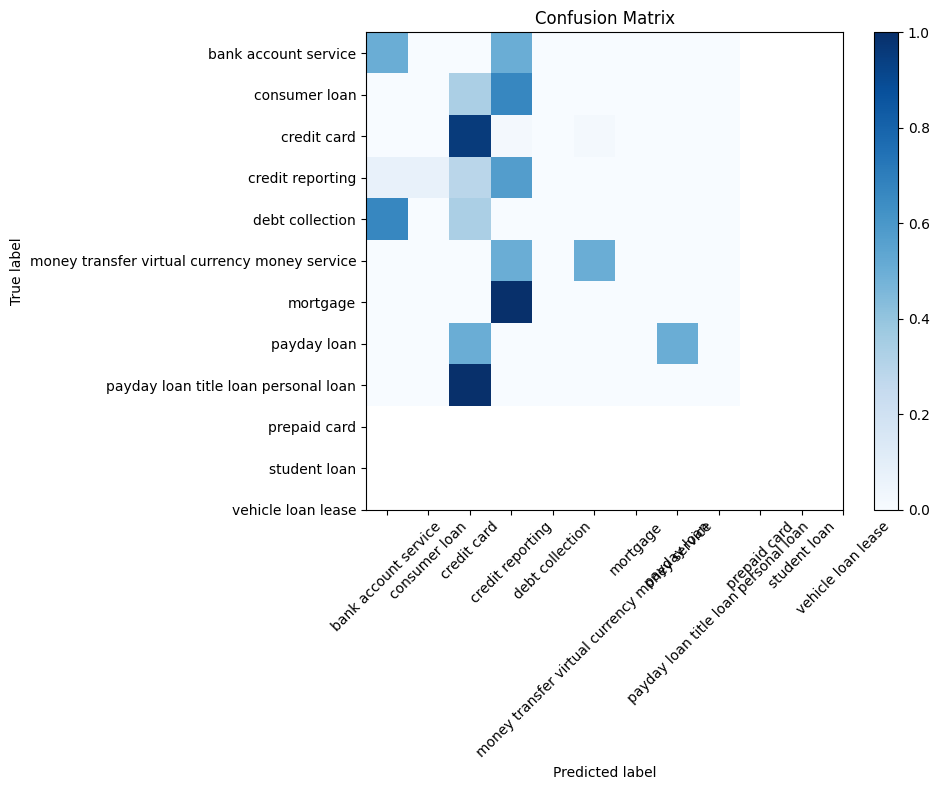

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(Y_test, predicted_labels)

conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix_norm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

classes = label_encoder.classes_
plt.xticks(np.arange(len(classes)), classes, rotation=45)
plt.yticks(np.arange(len(classes)), classes)
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()
